In [11]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics as sm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

import json
import requests

In [37]:
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=USD&limit=2000')
hist = pd.DataFrame(json.loads(res.content)['Data'])
hist = hist.set_index('time')
#hist.index = pd.to_datetime(hist.index, unit='s')

# Adding weighted price

hist['Weighted_Price'] = (hist.close + hist.high + hist.low + hist.open)/4

In [38]:
hist.head()

,close,high,low,open,volumefrom,volumeto,Weighted_Price
time,,,,,,,
1385251200,795.01,854.99,745.21,832.50,25948.64,20776035.16,806.9275
1385337600,829.99,849.99,758.95,795.01,26381.41,21438670.96,808.4850
1385424000,969.96,974.96,825.08,829.99,31613.86,28285852.13,899.9975
1385510400,1079.89,1094.78,914.27,969.96,37859.08,37868643.04,1014.7250
1385596800,1101.38,1224.48,1032.06,1079.89,37396.83,42912383.44,1109.4525


In [39]:
hist.dtypes

close             float64
high              float64
low               float64
open              float64
volumefrom        float64
volumeto          float64
Weighted_Price    float64
dtype: object

In [40]:
# to check null values in data
hist.isnull().sum()

close             0
high              0
low               0
open              0
volumefrom        0
volumeto          0
Weighted_Price    0
dtype: int64

In [41]:
corr_matrix = hist.corr()
corr_matrix

,close,high,low,open,volumefrom,volumeto,Weighted_Price
close,1.000000,0.999051,0.998565,0.997587,0.393416,0.829560,0.999478
high,0.999051,1.000000,0.997444,0.998800,0.407242,0.843880,0.999524
low,0.998565,0.997444,1.000000,0.997722,0.375810,0.808425,0.999076
open,0.997587,0.998800,0.997722,1.000000,0.397936,0.834531,0.999211
volumefrom,0.393416,0.407242,0.375810,0.397936,1.000000,0.640071,0.394214
volumeto,0.829560,0.843880,0.808425,0.834531,0.640071,1.000000,0.830051
Weighted_Price,0.999478,0.999524,0.999076,0.999211,0.394214,0.830051,1.000000


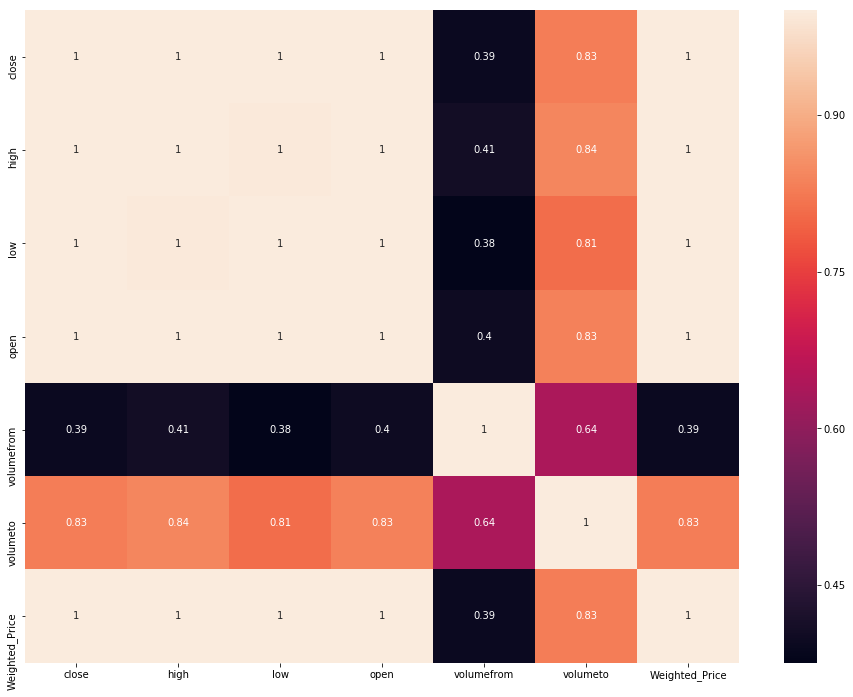

In [42]:
# plot the matrix as a heat map
plt.subplots(figsize = (16, 12))
sns.heatmap(corr_matrix, annot=True)

In [43]:
# split the set into subsets for training and testing
train_data, test_data = train_test_split(hist, train_size =0.8, random_state = 3)

/Users/tobiaskarentiuskromanndahl/test_jupyter/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [44]:
# We chose the living space in time as an input and Weighted_Price as an output
# reshape(-1,1) reshapes the column in one-dimensional array (1 column) and unknown number of rows (-1)
X_train = np.array(train_data.index).reshape(-1,1)
y_train = np.array(train_data['Weighted_Price']).reshape(-1, 1)
X_test = np.array(test_data.index).reshape(-1,1)
y_test = np.array(test_data['Weighted_Price']).reshape(-1, 1)

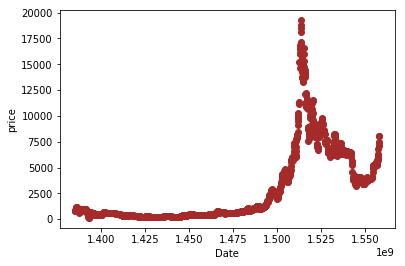

In [45]:
# plot the train set
plt.xlabel('Date')
plt.ylabel('price')

plt.scatter(X_train, y_train, color='brown')

plt.show()

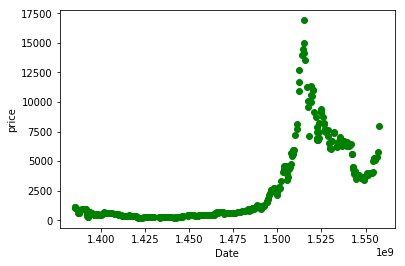

In [46]:
# plot the test set
plt.xlabel('Date')
plt.ylabel('price')

plt.scatter(X_test, y_test, color='green')

plt.show()

In [47]:
# Create regressor
regressor = linear_model.LinearRegression()

In [48]:
# Train model
model = regressor.fit(X_train, y_train)

# Test the model

In [49]:
# make prediction
y_predicted = regressor.predict(X_test)

In [50]:
y_predicted

array([[ 2394.44719667],
       [ 3612.94328175],
       [ 4868.48823429],
       [ 5971.72117619],
       [ -367.75169891],
       [-1116.9621296 ],
       [  -54.89459598],
       [ 2876.08247354],
       [-1166.36061954],
       [ 1373.54507133],
       [ 3213.63882144],
       [  373.22565013],
       [ 1340.6127447 ],
       [ 4436.25144735],
       [ 6165.1985951 ],
       [ 5197.81150053],
       [   39.78584306],
       [ 3765.25529239],
       [ 1443.5262654 ],
       [-1108.72904795],
       [ -758.82307757],
       [ 5687.67985906],
       [ 3732.32296576],
       [  118.00011879],
       [ 2270.95097183],
       [ 1641.12022515],
       [ 5955.25501288],
       [ 6473.9391572 ],
       [  -83.71038178],
       [ 2007.49235884],
       [ 5136.06338811],
       [ -507.71408706],
       [ 4069.87931366],
       [ 3629.40944506],
       [ 2048.65776712],
       [-1438.05231419],
       [ 3485.33051608],
       [ 1661.70292929],
       [ 2262.71789017],
       [ -363.63515808],


In [51]:
y_test

array([[  685.3575],
       [ 1188.4   ],
       [ 7134.605 ],
       [ 6362.325 ],
       [  521.945 ],
       [  495.775 ],
       [  343.4325],
       [  616.1575],
       [  944.065 ],
       [  246.4325],
       [  957.5725],
       [  219.16  ],
       [  237.72  ],
       [ 5696.1825],
       [ 3618.3725],
       [ 9134.2075],
       [  352.9   ],
       [ 1768.7925],
       [  299.92  ],
       [  389.1925],
       [  442.3875],
       [ 6616.67  ],
       [ 1529.3525],
       [  349.8225],
       [  455.82  ],
       [  452.4   ],
       [ 6467.2225],
       [ 3824.1425],
       [  380.485 ],
       [  412.0675],
       [ 7437.0125],
       [  625.255 ],
       [ 2627.9375],
       [ 1213.195 ],
       [  416.7375],
       [ 1014.725 ],
       [ 1234.8125],
       [  449.21  ],
       [  455.7925],
       [  499.925 ],
       [ 3992.365 ],
       [  430.4125],
       [  205.8775],
       [  736.48  ],
       [  235.53  ],
       [  380.59  ],
       [  241.5225],
       [ 6454

No handles with labels found to put in legend.


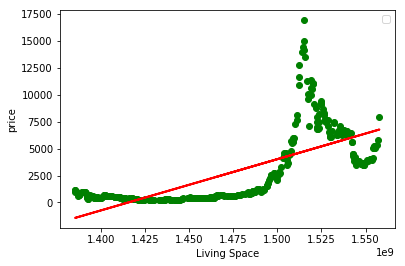

In [52]:
# plot the prediction
plt.xlabel('Living Space')
plt.ylabel('price')
plt.legend()

plt.scatter(X_test, y_test, color='green', label = 'test data')
plt.plot(X_test, y_predicted, color='red', linewidth=2, label= 'predicted regression line')

# y_predicted, X_test, 
plt.show()

In [53]:
# Compute the coeficients a and b
# so the formula would be y = ax + b
a = regressor.coef_
b = regressor.intercept_
print('Coefficient a: ', a)
print('Intercept b: ', b)

Coefficient a:  [[4.76451485e-05]]
Intercept b:  [-67450.90103176]


In [54]:
# Compute performance metrics
print("Linear Regressor Performance")

# The mean squared error
print("Mean squared error: %.2f" % sm.mean_squared_error(y_test, y_predicted))

# Explained variance score: 1 is perfect prediction
print('Explained variance score ', round(sm.explained_variance_score(y_test, y_predicted), 2))
print('R-squared (training) ', round(regressor.score(X_train, y_train), 2))
print('R-squared (testing) ',  round(regressor.score(X_test, y_test), 2))
print('R2 score: %.2f' % sm.r2_score(y_test, y_predicted))

Linear Regressor Performance
Mean squared error: 5374908.29
Explained variance score  0.49
R-squared (training)  0.47
R-squared (testing)  0.49
R2 score: 0.49


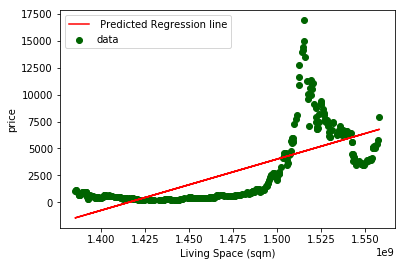

In [55]:
plt.scatter(X_test, y_test, color= 'darkgreen', label = 'data')
plt.plot(X_train, regressor.predict(X_train), color='red', label= ' Predicted Regression line')
plt.xlabel('Living Space (sqm)')
plt.ylabel('price')
plt.legend()